<a href="https://colab.research.google.com/github/dstephenhaynes/DTSA5509/blob/main/DTSA5509_Final_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <center>
<h1><center>Supervised Learning Project</center></h1>
<h2><center>Introduction to Machine Learning: Supervised Learning
DTSA-5509

University of Colorado Boulder

D. Stephen Haynes
</center></h2>



##Loan Prediction
- This project will use a variety of Supervised Learning methods to determine which method provides the best prediction accuracy for a particular dataset.
- The code below will test the following Supervised Learning methods on this dataset:
  - Linear Regression
  - Random Forest
  - Support Vector Machine
  - K-Nearest Neighbors
  - Decision Tree
- The main goal for this project is to determine the most accurate Supervised Learning method and most significant feature(s) from the dataset for predicting financial loan approval.


### The Dataset
- The chosen dataset is the Loan Prediction Problem Dataset, created by 'altruistdelhite04' and available at Kaggle: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/data
- This dataset was downloaded as two, pre-split CSV files consisting of 614 Training entries and 367 Test entries. The data provides a list of personal and financial details about loan applicants. In the case of the Training dataset, it also provides detail as to whether or not the individual was approved for a financial loan.

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Load training and test datasets from github. Original data from Kaggle available here: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/data
train = pd.read_csv('https://raw.githubusercontent.com/dstephenhaynes/DTSA5509/main/loans_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dstephenhaynes/DTSA5509/main/loans_test.csv')

# Data Cleaning

First, let's take a look at the details for each data file.

In [26]:
# Display components of initial datasets
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   C

Based on the Non-Null Count, there are some missing or Null entries in the dataset.

The code below will perform the following cleaning steps:
- Identify the missing values
- For Categorical Variables, impute the missing values with the variable mode
- For Numerical Variables, impute the missing values with the variable median
- Identify entries with outliers in the numerical features and floor or cap them within the dataset

Missing values in train data before cleaning:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values in test data before cleaning:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


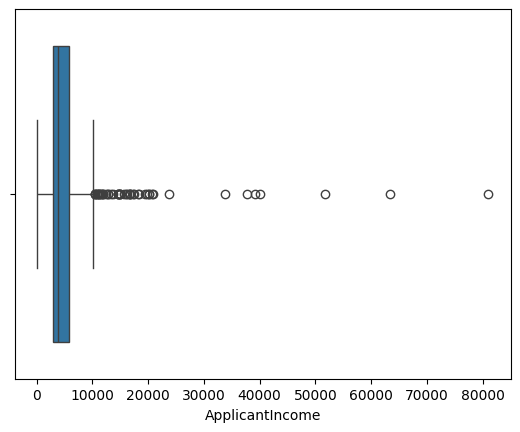

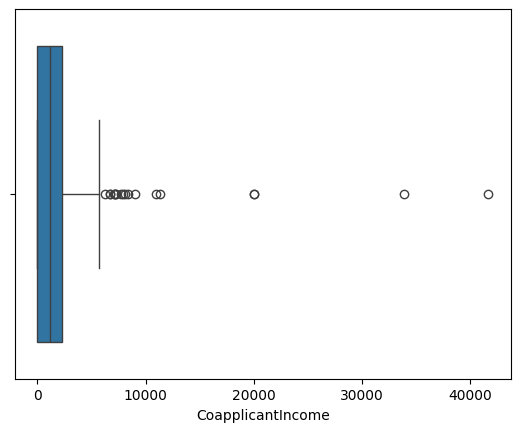

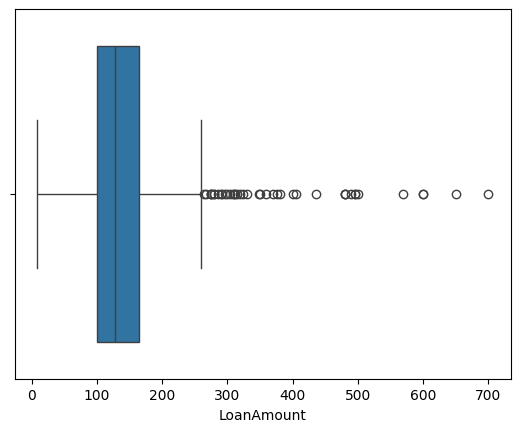

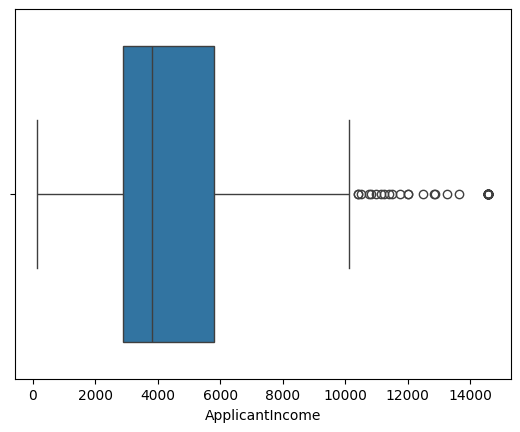

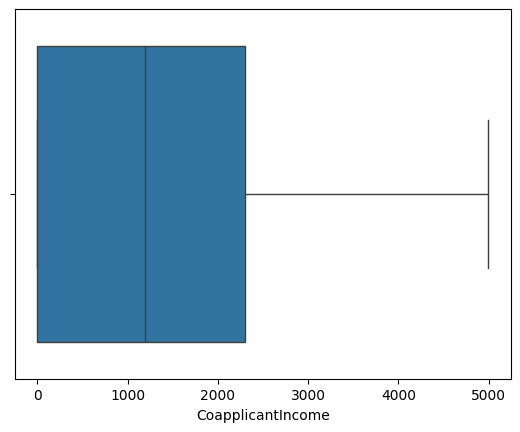

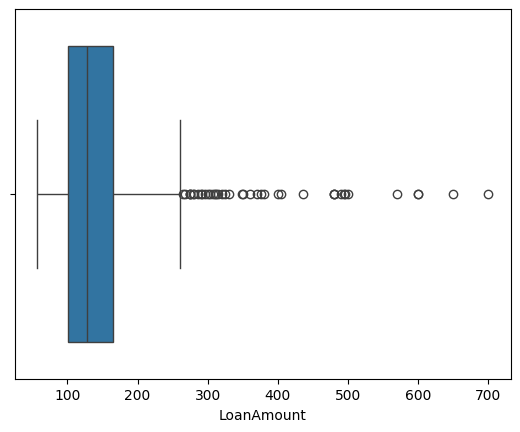

Missing values in train data after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Missing values in test data after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [27]:
# Displaying missing values
print("Missing values in train data before cleaning:")
print(train.isnull().sum())
print("\nMissing values in test data before cleaning:")
print(test.isnull().sum())

# Handling missing values
# For categorical variables, impute missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

# For numerical variables, impute missing values with the median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)
train['Credit_History'].fillna(train['Credit_History'].median(), inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].median(), inplace=True)


# Outlier Detection
# Visualize numerical columns to identify outliers
sns.boxplot(x=train['ApplicantIncome'])
plt.show()

sns.boxplot(x=train['CoapplicantIncome'])
plt.show()

sns.boxplot(x=train['LoanAmount'])
plt.show()

# Capping outliers for ApplicantIncome and CoapplicantIncome
train['ApplicantIncome'] = np.where(train['ApplicantIncome'] > train['ApplicantIncome'].quantile(0.95),
                                    train['ApplicantIncome'].quantile(0.95),
                                    train['ApplicantIncome'])
train['CoapplicantIncome'] = np.where(train['CoapplicantIncome'] > train['CoapplicantIncome'].quantile(0.95),
                                      train['CoapplicantIncome'].quantile(0.95),
                                      train['CoapplicantIncome'])

# Flooring outliers for LoanAmount
train['LoanAmount'] = np.where(train['LoanAmount'] < train['LoanAmount'].quantile(0.05),
                                train['LoanAmount'].quantile(0.05),
                                train['LoanAmount'])

# After handling outliers, visualize again
sns.boxplot(x=train['ApplicantIncome'])
plt.show()

sns.boxplot(x=train['CoapplicantIncome'])
plt.show()

sns.boxplot(x=train['LoanAmount'])
plt.show()

# Displaying missing values
print("Missing values in train data after cleaning:")
print(train.isnull().sum())
print("\nMissing values in test data after cleaning:")
print(test.isnull().sum())

- We also need to convert several of the variables to a numeric format for feature correlation and other analysis

In [28]:
# Convert categorical variables to numerical format
le = LabelEncoder()

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for feature in categorical_features:
    train[feature] = le.fit_transform(train[feature])
    if feature != 'Loan_Status':  # 'Loan_Status' is not present in the test set
        test[feature] = le.transform(test[feature])

# Display the cleaned data
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   C

## Data Cleaning Conclusion
The output above shows success in imputing the missing data values without completely trimming any entries, as well as conversion of most of the object type variables to numeric data types.

The success of these cleaning steps will help maintain the size of the dataset while preventing errors in future analysis steps due to missing or improper variables.

# Exploratory Data Analysis
- First, using the training data, we'll look at how the Loan_Status outcome relates to the other variables in the dataset.
- The next step will create a correlation matrix to help identify the relationship between all variables and identify those that most significantly impact Loan_Status.
- We'll also perform a Chi-square test to verify the significance of these variables against Loan_Status.**bold text**

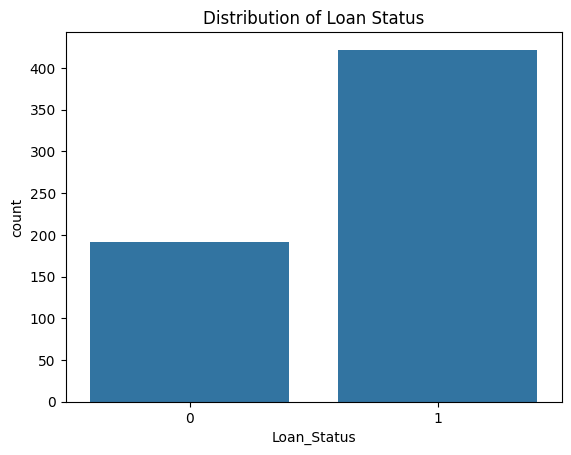

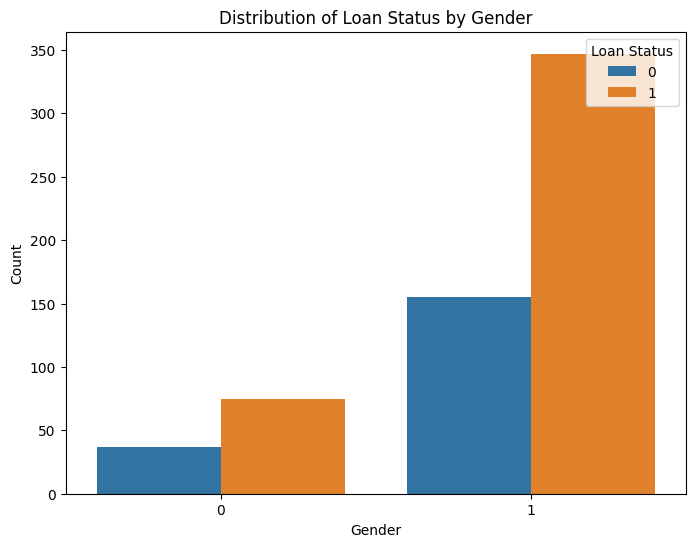

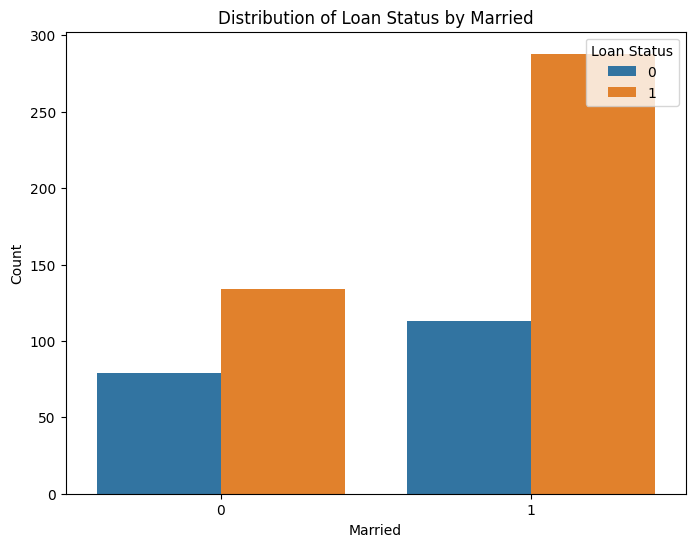

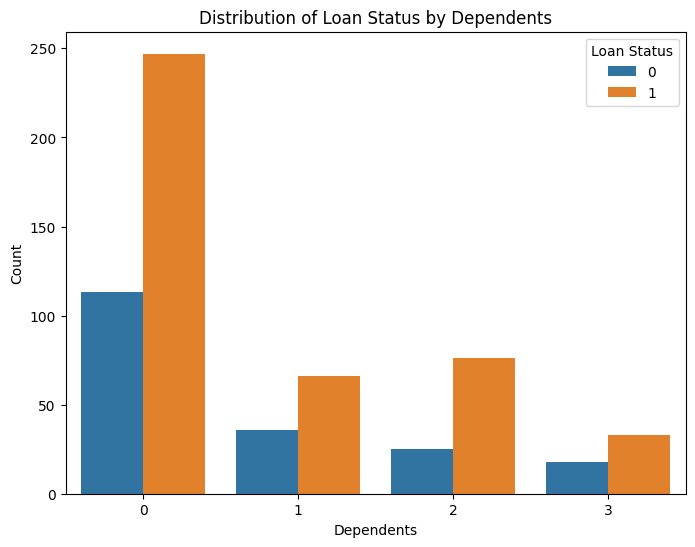

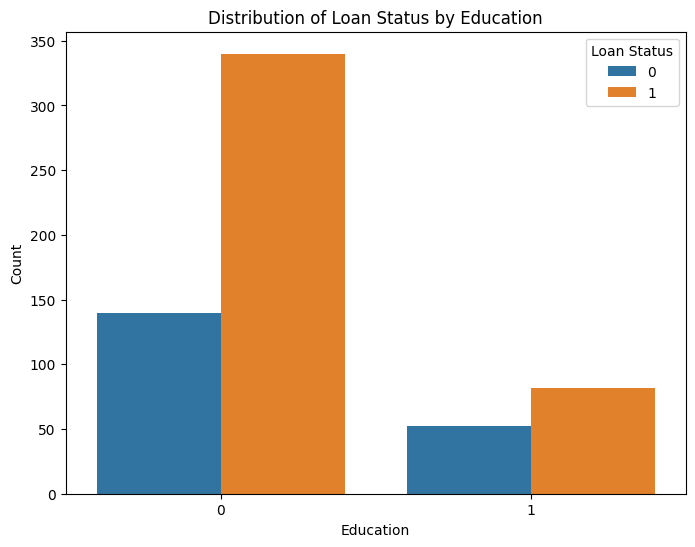

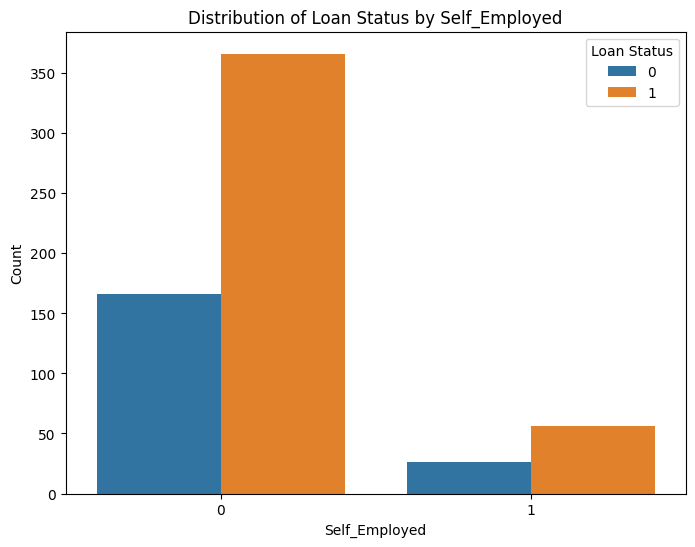

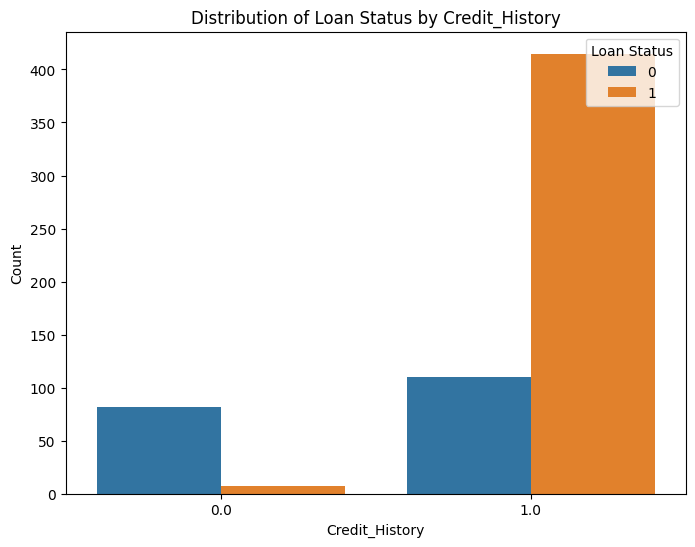

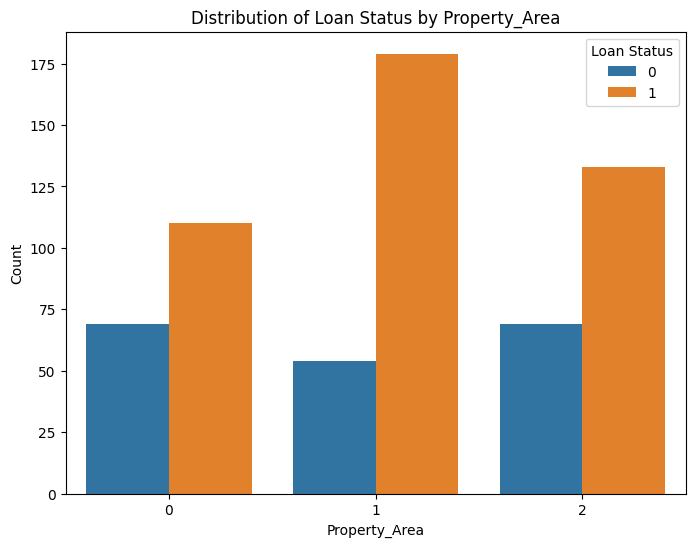

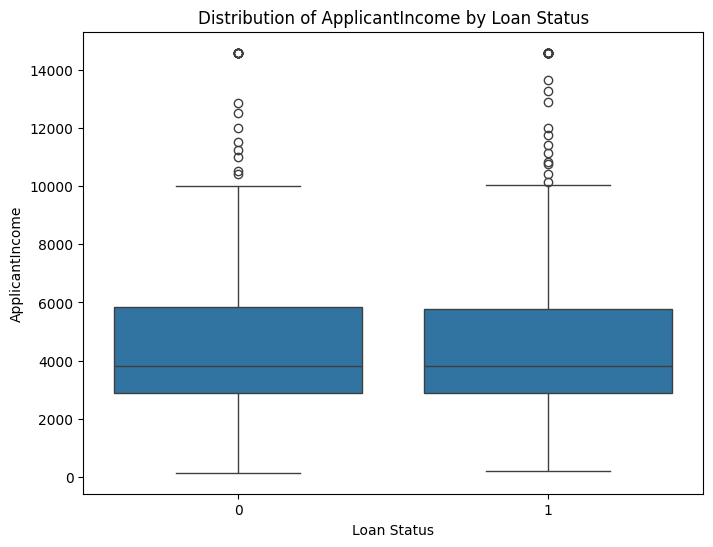

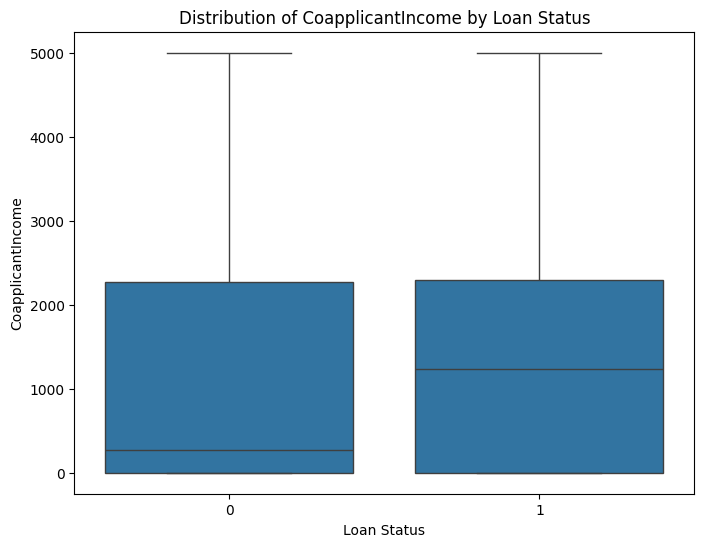

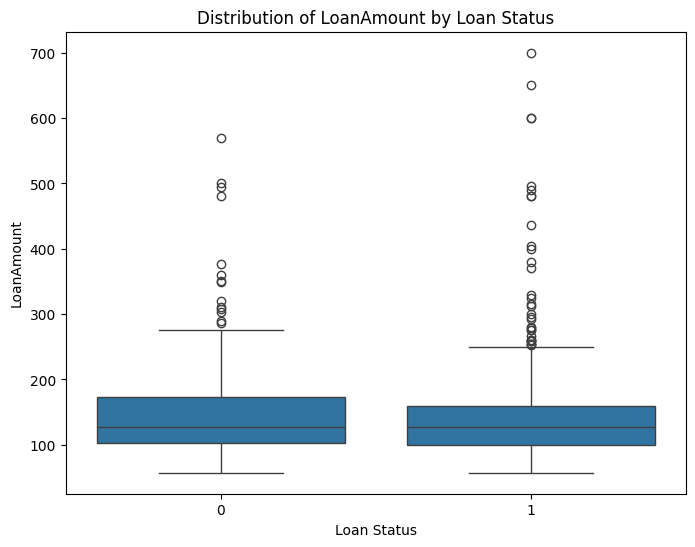

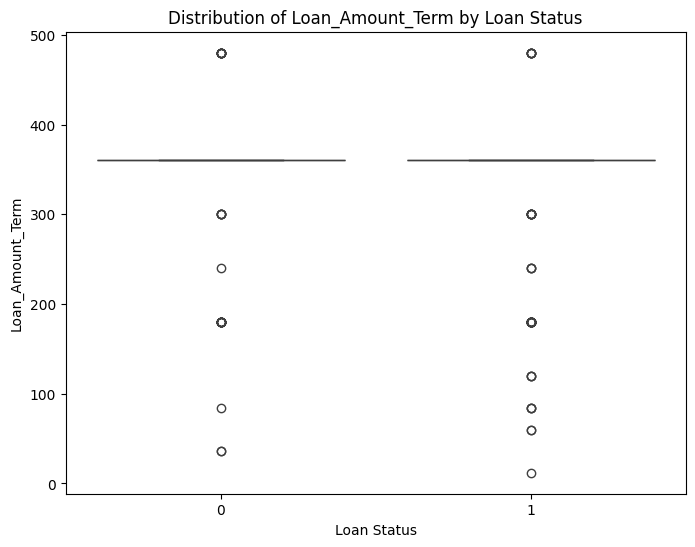

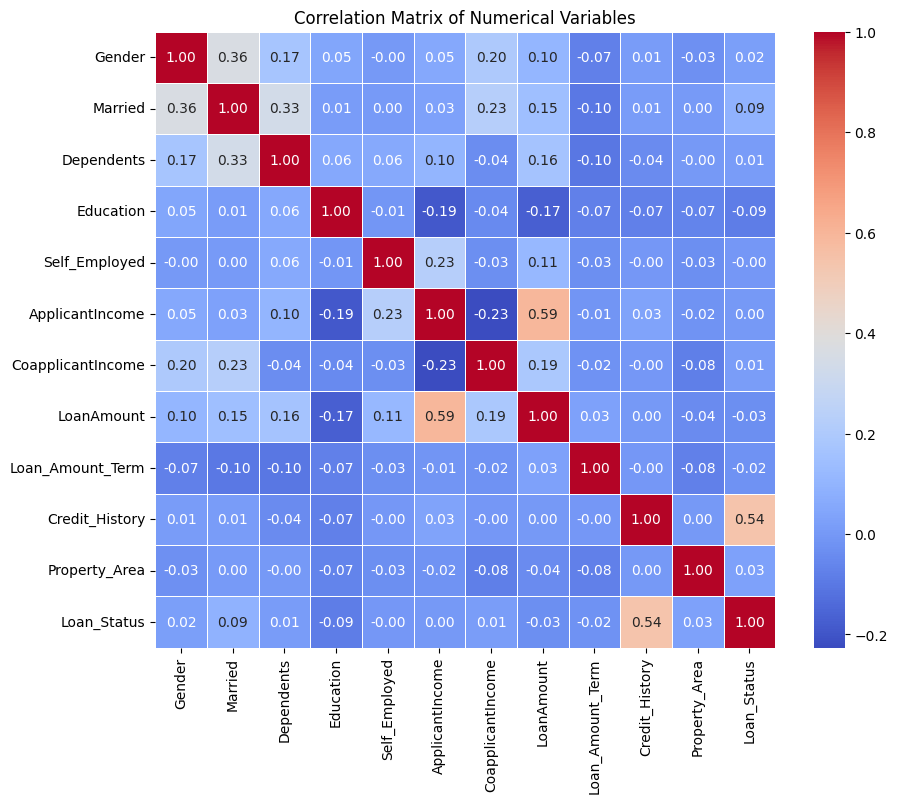

Chi-square test result for Gender:
Chi2 value: 0.11087854691241235
P-value: 0.7391461310869638

Chi-square test result for Married:
Chi2 value: 4.73187557933362
P-value: 0.029608580862582116

Chi-square test result for Dependents:
Chi2 value: 3.1513990012324227
P-value: 0.3688663081366005

Chi-square test result for Education:
Chi2 value: 4.091490413303621
P-value: 0.04309962129357355

Chi-square test result for Self_Employed:
Chi2 value: 0.0
P-value: 1.0

Chi-square test result for Credit_History:
Chi2 value: 176.1145746235241
P-value: 3.4183499979091188e-40

Chi-square test result for Property_Area:
Chi2 value: 12.297623130485677
P-value: 0.0021360187811644915



In [29]:
# Explore the distribution of the target variable 'Loan_Status'
sns.countplot(x='Loan_Status', data=train)
plt.title('Distribution of Loan Status')
plt.show()

# Visualize the relationship between Loan_Status and other categorical variables using stacked bar plots
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='Loan_Status', data=train)
    plt.title(f'Distribution of Loan Status by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()

# Visualize the distribution of numerical variables by Loan_Status using box plots
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Loan_Status', y=var, data=train)
    plt.title(f'Distribution of {var} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(var)
    plt.show()

# Drop non-numeric and non-relevant columns for correlation matrix calculation
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
train_numeric = train[numeric_columns]

# Compute the correlation matrix to understand the relationships between numerical variables
correlation_matrix = train_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Define a function to perform chi-square test for independence
def chi_square_test(df, var):
    contingency_table = pd.crosstab(df['Loan_Status'], df[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test result for {var}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    print("")

# Perform chi-square test for independence for each categorical variable
for var in categorical_vars:
    chi_square_test(train, var)

- Create a pair plot to help identify anything the above visuals may have missed.

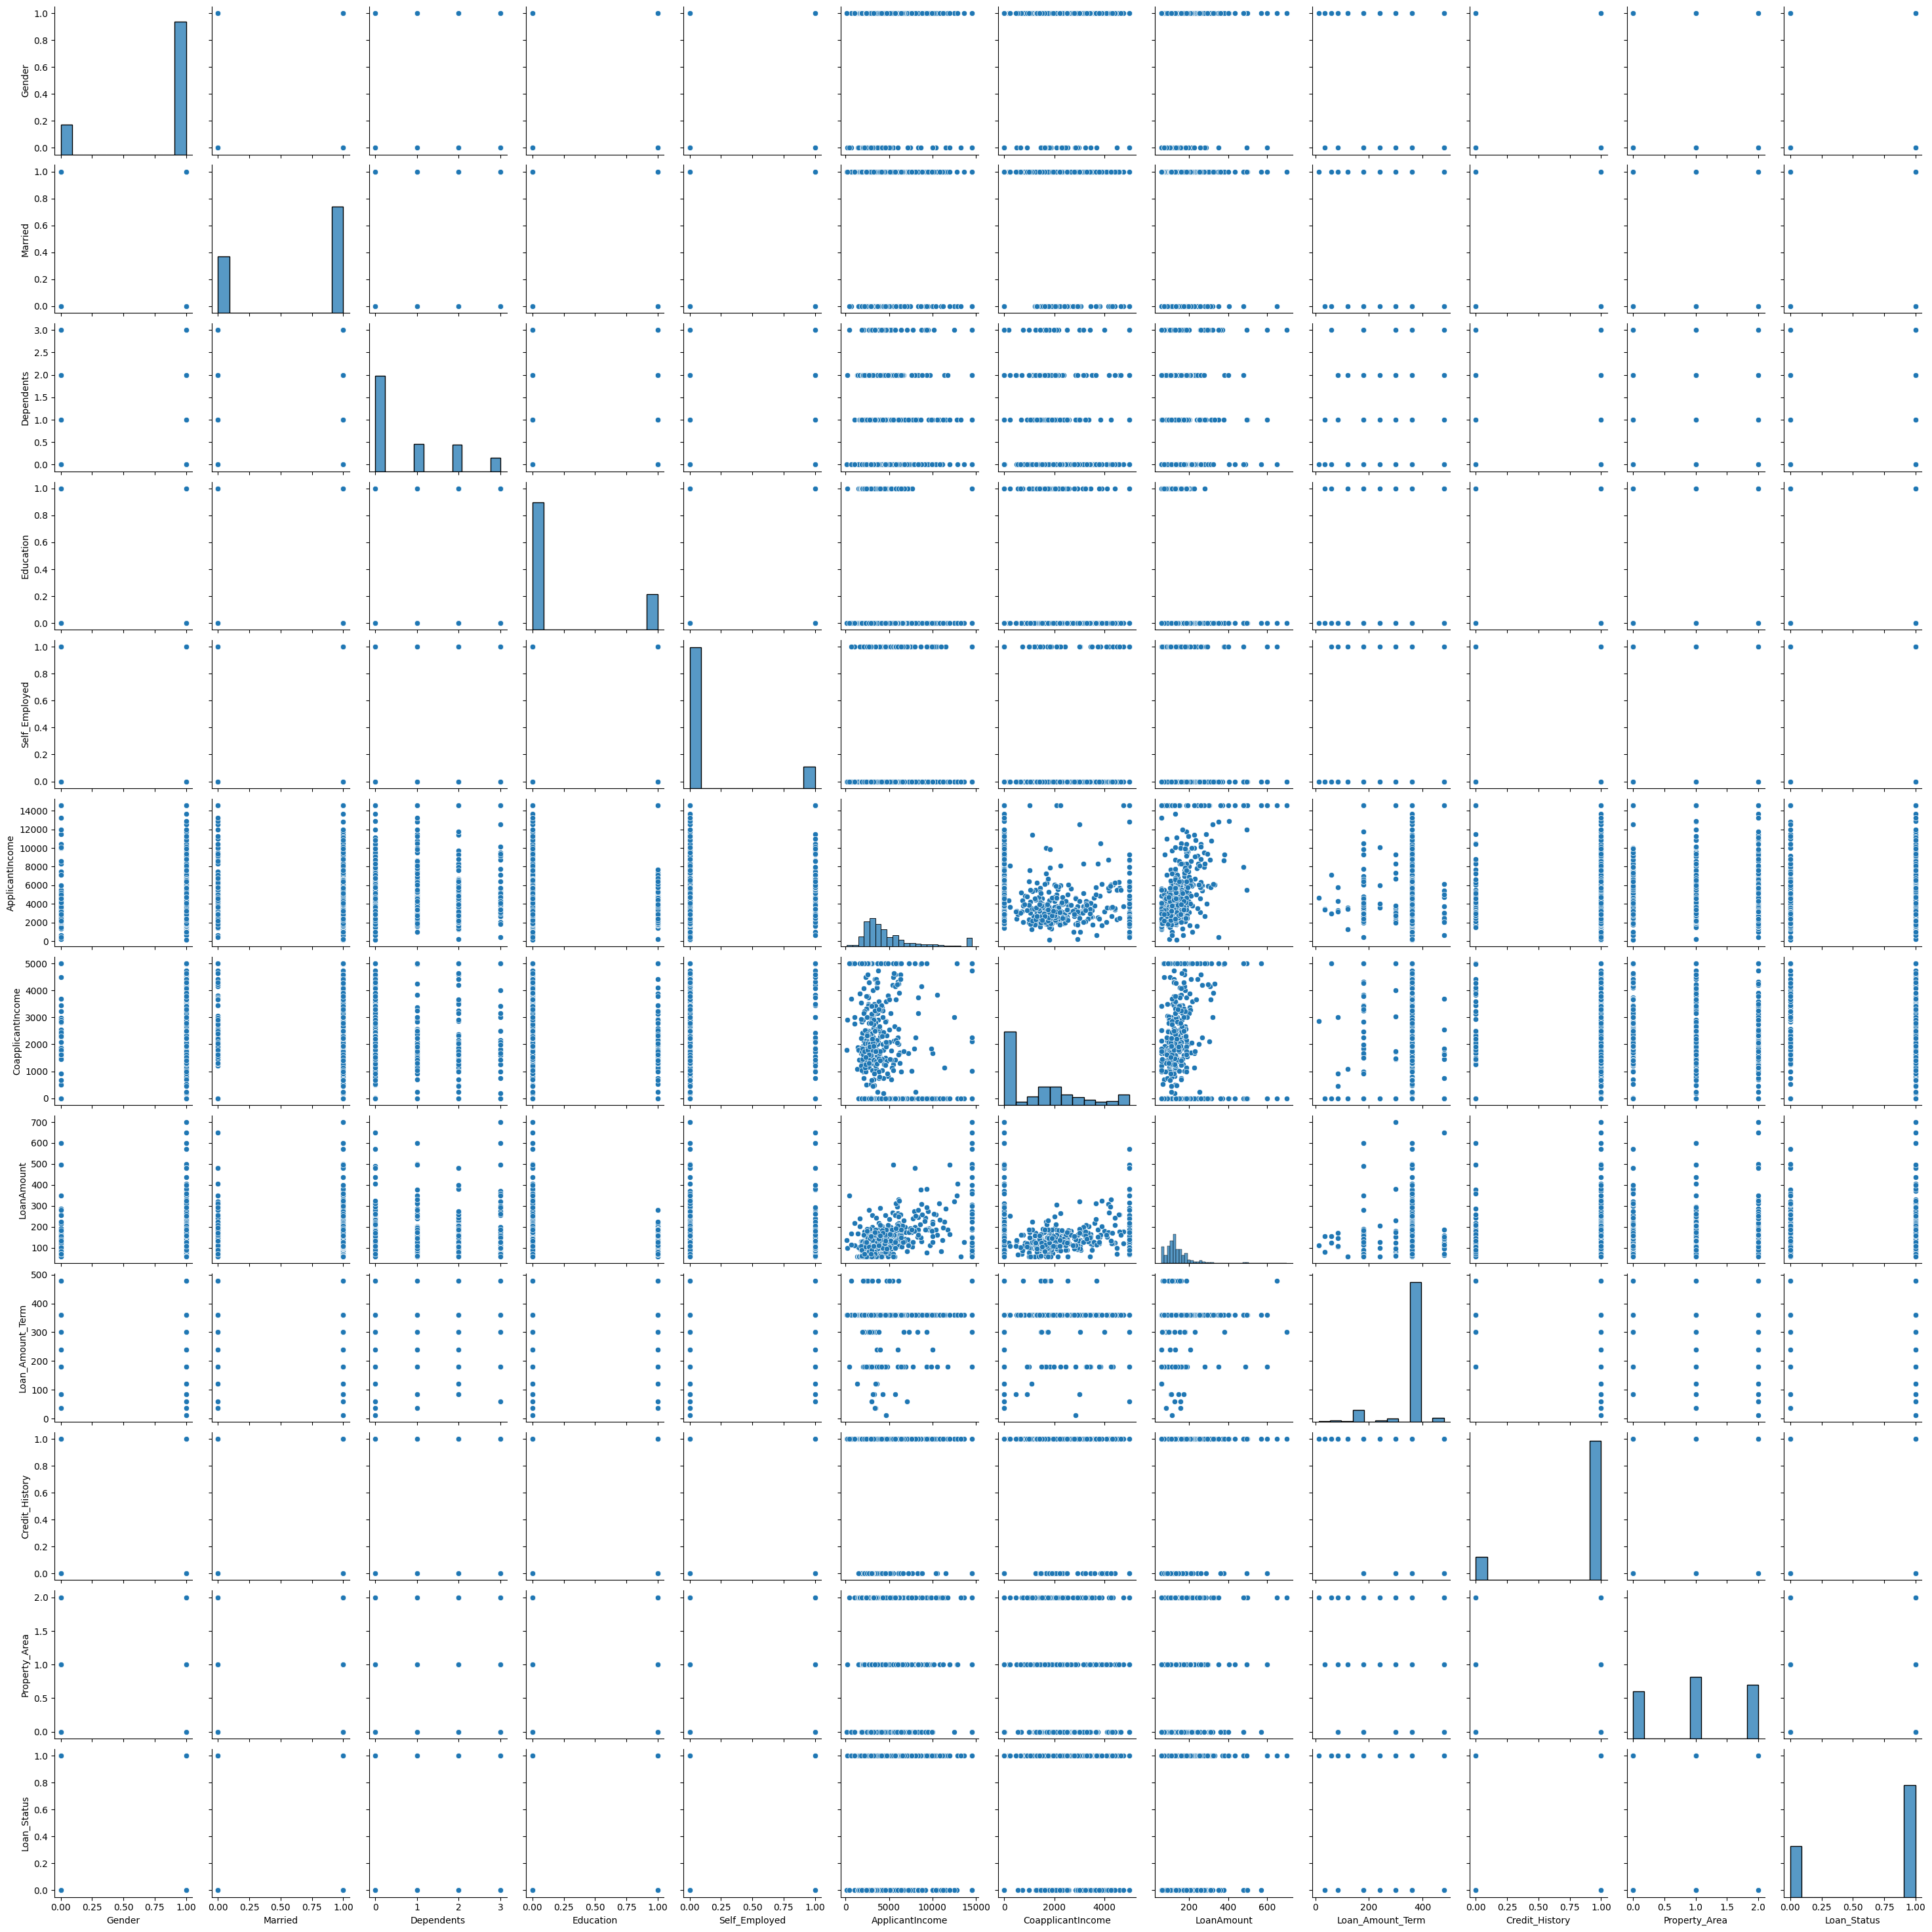

In [30]:
# Create a pairplot to identify any additional feature relationships
sns.pairplot(train)

## Conclusion
- Based on the visualizations above, it is quite clear that Credit_History is the most significant variable for determining Loan_Status. In future steps, we'll evaluate Credit_History exclusively but also analyze additional variables to determine if they improve performance of our models.

# Model Testing
In order to test a varity of Supervised Learning models, we'll iteratively test the five methods listed previously.

However, to start, let's identify if there is any multicollinearity in the data.
- Calculate the Variance Inflation Factor and trim any variables with a VIF score greater than 10.

In [31]:
# Define function to calculate VIF
def calculate_vif(df, features):
    X = df[features].assign(Intercept=1)  # Add intercept for VIF calculation
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data['feature'] != 'Intercept'].reset_index(drop=True)

# Convert categorical variables to numerical format
le = LabelEncoder()
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for feature in categorical_features:
    train[feature] = le.fit_transform(train[feature])
    if feature in test.columns:
        test[feature] = le.transform(test[feature])

# Initial features list
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calculate initial VIF
vif_data = calculate_vif(train, features)
print("Initial VIF Data:\n", vif_data)

# Remove features with high VIF iteratively
high_vif_threshold = 10
while vif_data['VIF'].max() > high_vif_threshold:
    high_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
    print(f'Removing feature with highest VIF: {high_vif_feature}')
    features.remove(high_vif_feature)
    vif_data = calculate_vif(train, features)
    print(vif_data)

Initial VIF Data:
               feature       VIF
0              Gender  1.192480
1             Married  1.325971
2          Dependents  1.193125
3           Education  1.078719
4       Self_Employed  1.061169
5     ApplicantIncome  2.024834
6   CoapplicantIncome  1.396701
7          LoanAmount  1.916608
8    Loan_Amount_Term  1.036807
9      Credit_History  1.009002
10      Property_Area  1.023207


- Perform simple logistic regression to identify a baseline accuracy score.

In [32]:
# Create Logistic Regresion model to test coefficient significance
X = train.drop(columns=['Loan_Status'])  # Features
y = train['Loan_Status']  # Target variable

# Convert categorical variables to one-hot encoding
X_encoded = pd.get_dummies(X)

# Convert categorical target variable to numeric using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')

# Fit the model
logistic_model.fit(X_train, y_train)

# Predict on test set
y_pred = logistic_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7886178861788617


- Determine which coefficient features created the highest impact to Loan_Status.

In [33]:
# Extract coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the feature importance
print("Feature Importance:")
print(feature_importance)


Feature Importance:
              Feature  Coefficient
9      Credit_History     3.121236
337  Loan_ID_LP002068     0.791168
212  Loan_ID_LP001677     0.775463
538  Loan_ID_LP002706     0.754248
133  Loan_ID_LP001431     0.708686
..                ...          ...
395  Loan_ID_LP002236    -0.739194
596  Loan_ID_LP002912    -0.740003
147  Loan_ID_LP001489    -0.746378
339  Loan_ID_LP002086    -0.769620
524  Loan_ID_LP002648    -0.779927

[625 rows x 2 columns]


- Now, we'll test our five methods with Credit_History as the predictor
- We'll also test the five methods with additional features to identify any improvement in model fit.
- The code below will iterate through all five models and output a Cross Validation score and F1 scoring for each.

In [34]:
# Iterate over 5 model types and print Cross-Validation Accuracy and F1 Scores for each
# Initially, test the 5 models focused on Credit_History only and then add additional features

# Initialize model types
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

# Define additional features
additional_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Iterate over models
for name, model in models.items():
    print(f"Model: {name}")

    # Without additional features
    X = train[['Credit_History']]
    y = train['Loan_Status']
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Calculate F1 scores manually
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

    print(f"  Without Additional Features:")
    print(f"  - Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"  - F1 Score: {f1_scores.mean():.4f}")

    # With additional features
    X = train[['Credit_History'] + additional_features]
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Calculate F1 scores manually
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

    print(f"  With Additional Features:")
    print(f"  - Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"  - F1 Score: {f1_scores.mean():.4f}")
    print()

Model: Logistic Regression
  Without Additional Features:
  - Cross-Validation Accuracy: 0.8095 (+/- 0.0328)
  - F1 Score: 0.8765
  With Additional Features:
  - Cross-Validation Accuracy: 0.8062 (+/- 0.0447)
  - F1 Score: 0.8741

Model: Random Forest
  Without Additional Features:
  - Cross-Validation Accuracy: 0.8095 (+/- 0.0328)
  - F1 Score: 0.8765
  With Additional Features:
  - Cross-Validation Accuracy: 0.7639 (+/- 0.0409)
  - F1 Score: 0.8406

Model: Support Vector Machine
  Without Additional Features:
  - Cross-Validation Accuracy: 0.8095 (+/- 0.0328)
  - F1 Score: 0.8765
  With Additional Features:
  - Cross-Validation Accuracy: 0.6857 (+/- 0.0069)
  - F1 Score: 0.8135

Model: K-Nearest Neighbors
  Without Additional Features:
  - Cross-Validation Accuracy: 0.8095 (+/- 0.0328)
  - F1 Score: 0.8765
  With Additional Features:
  - Cross-Validation Accuracy: 0.6107 (+/- 0.0664)
  - F1 Score: 0.7430

Model: Decision Tree
  Without Additional Features:
  - Cross-Validation Accura

With Credit_History as the only predictor, all five methods performed identically.

The inclusion of additional features reduced the performance of each model in every case, so we'll continue with a single feature.

We'll choose the Support Vector Machine model and attempt to tune the hyperparameters for improved fit.

In [35]:
# Using SVM model, iteratively test hyperparameters for improved fit

# Define features and target variable
X = train[['Credit_History']]
y = train['Loan_Status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for SVM
param_grid = {'C': [2**i for i in range(-5, 6)], 'gamma': [2**i for i in range(-5, 6)]}

# Initialize SVM model
svm_model = SVC(kernel = 'rbf')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)
print()

# Evaluate model performance on test set using best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Parameters: {'C': 0.03125, 'gamma': 0.5}

Accuracy on Test Set: 0.7886178861788617


Using the best parameter values identified above, we'll visualize the GridSearchCV results.

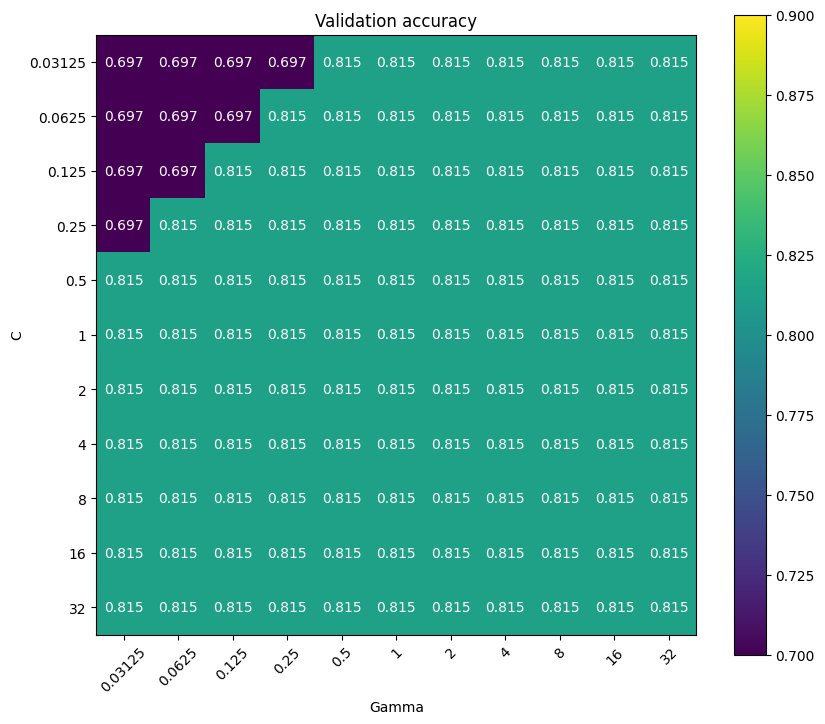

In [36]:
# Function to plot the search grid
def plotSearchGrid(grid):
    scores = np.array(grid.cv_results_["mean_test_score"]).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))
    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap='viridis', vmin=0.7, vmax=0.9)  # Adjust the color map and limits
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')

    # Annotate each cell with the corresponding test score
    for i in range(len(grid.param_grid["C"])):
        for j in range(len(grid.param_grid["gamma"])):
            plt.text(j, i, f'{scores[i, j]:.3f}', ha='center', va='center', color='white')

    plt.show()

# Plot the search grid
plotSearchGrid(grid_search)

By tuning the hyperparameters for the Support Vector Machine method, we are able to achieve a slight improvement in model performance.

80.95% to 81.50% Accuracy

Having chosen and tuned our model, let's apply this analysis to our test data.

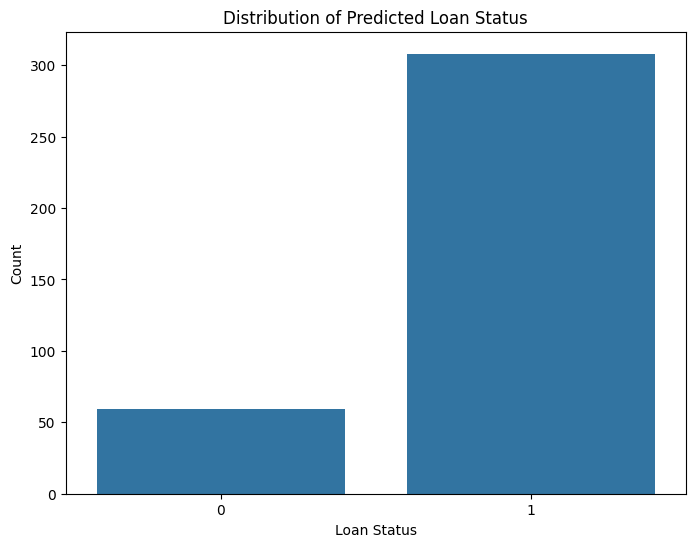

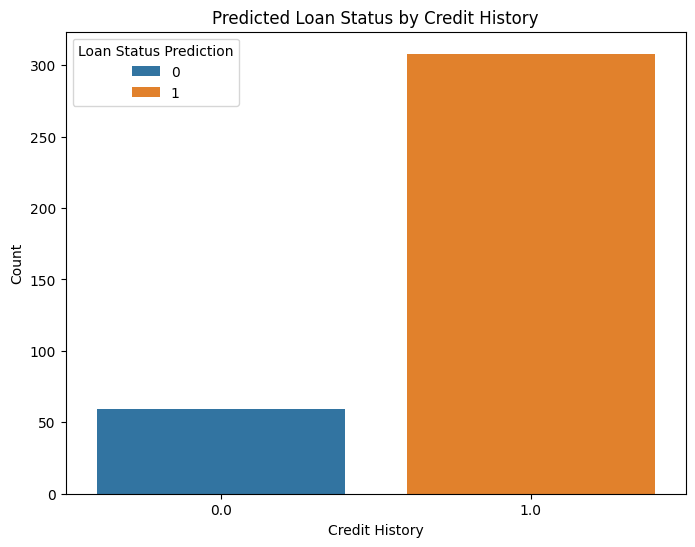

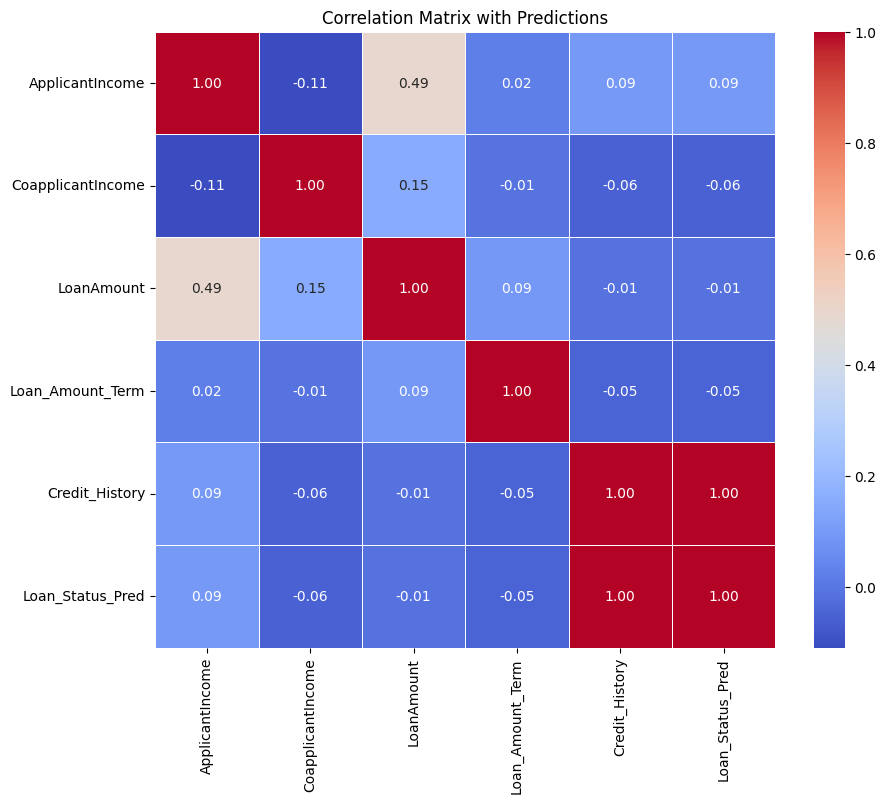

In [37]:
# Prepare the data
X_train_full = train[['Credit_History']]
y_train_full = train['Loan_Status']
X_test_full = test[['Credit_History']]

# Label encode the target variable in the training data
label_encoder = LabelEncoder()
y_train_full_encoded = label_encoder.fit_transform(y_train_full)

# Best hyperparameters found
best_C = 0.03125
best_gamma = 0.5

# Train the best model on the full training data
best_model = SVC(C=best_C, gamma=best_gamma, kernel='rbf')
best_model.fit(X_train_full, y_train_full_encoded)

# Predict on the test data
test_predictions = best_model.predict(X_test_full)

# Inverse transform the predictions to get the original labels
test_predictions = label_encoder.inverse_transform(test_predictions)

# Add predictions to the test dataframe
test['Loan_Status_Pred'] = test_predictions

# Visualization of the results

# Plot distribution of predicted loan status
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status_Pred', data=test)
plt.title('Distribution of Predicted Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Plot count of predictions by credit history
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status_Pred', data=test)
plt.title('Predicted Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status Prediction')
plt.show()

# Additional visualization example: Heatmap of the correlation matrix with predictions
# Drop non-numeric columns
numeric_columns = test.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']).select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
correlation_matrix = test[numeric_columns].corr()  # Use only numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Predictions')
plt.show()


# Conclusion

Considering Credit_History was found to be the only feature with any significance, it comes as no surprise that our model was able to predict the outcome of the test data perfectly, using only Credit_History as the predictor.

In hindsight, it appears that this dataset is too simple for analysis with the methods tested. In addition, the insignificance of nearly every feature created a nearly 1-1 linear alignment of Credit_History to Loan_Status. This direct linear relationship also explains why the accuracy results of each model were identical and, one can assume, that tuning the parameters of the other four models may have achieved similar, nearly insignificant improvements.

Future improvements to this type of project would certainly require a larger and more complex dataset for analysis. A dataset that included even a single additional feature that significantly impacted the results would help show differences in model performance.

Overall, this project is an example that simple methods should be applied to simple data. Attempting to apply complex data analysis methods to simplistic datasets is only helpful as a practice exercise.